# Практика №3
## Дослідження даних за допомогою бібліотеки pandas

In [1]:
# імпорт модулів
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# зчитайте файл players_20.csv
df_data = pd.read_csv('players_20.csv')

In [4]:
# виведіть перші 5 рядків
print("Перші 5 рядків:")
print(df_data.head())

Перші 5 рядків:
   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  ...   lwb   ldm  \
0        170         72   Argentina

In [5]:
# отримайте розміри обєкту DataFrame
print("Розміри DataFrame:", df_data.shape)

Розміри DataFrame: (18278, 104)


Результат має бути $(18278, 104)$

In [6]:
# Отримайте список стовпців міток (див. атрибут columns, а потім використайте метод list() щоб перетворити їх на список)
df_columns = df_data.columns.tolist()
print("Список стовпців:", df_columns)


Список стовпців: ['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_sho

In [7]:
# створіть список з переліком назв стовпців, які потім необхідно буде видалити
# Перелік стовпців: 'dob','sofifa_id', 'player_url', 'long_name', 'body_type', 'real_face', 'loaned_from', 'nation_position', 'nation_jersey_number'
useless_columns = ['dob', 'sofifa_id', 'player_url', 'long_name', 'body_type', 'real_face', 'loaned_from', 'nation_position', 'nation_jersey_number']


In [8]:
# видаліть вказані вище мітки стовпці (див. метод drop і зверніть увагу на параметр axis, оскільки необхідно видалити саме стовпці)
df_dropped = df_data.drop(useless_columns, axis=1)


In [9]:
# виведіть останні 5 рядків за стовпцем з міткою 'weight_kg'
print(df_dropped['weight_kg'].tail())

18273    79
18274    66
18275    75
18276    74
18277    78
Name: weight_kg, dtype: int64


In [10]:
# виведіть перші 5 рядків за два стовпцями з мітками 'short_name', 'weight_kg'
print(df_dropped[['short_name', 'weight_kg']].head())

          short_name  weight_kg
0           L. Messi         72
1  Cristiano Ronaldo         83
2          Neymar Jr         68
3           J. Oblak         87
4          E. Hazard         74


In [11]:
# розрахуйте індекс маси тіла для кожного гравця і отримані дані мають бути додані до df_dropped за стовпцем з назвою мітки 'BMI'
df_dropped['BMI'] = df_dropped['weight_kg'] / ((df_dropped['height_cm'] / 100) ** 2)


При розрахунку індексу маси тіла зверніть увагу на те, що зріст гравця вказано у см, а при розрахунку зріст має бути у метрах. Формула для розрахунку:
$$BMI = m/h^2 $$


In [12]:
# вивести перші п'ять рядків зі стовпцями з мітками 'short_name' і 'BMI'
print(df_dropped[['short_name', 'BMI']].head())

          short_name        BMI
0           L. Messi  24.913495
1  Cristiano Ronaldo  23.735308
2          Neymar Jr  22.204082
3           J. Oblak  24.615211
4          E. Hazard  24.163265


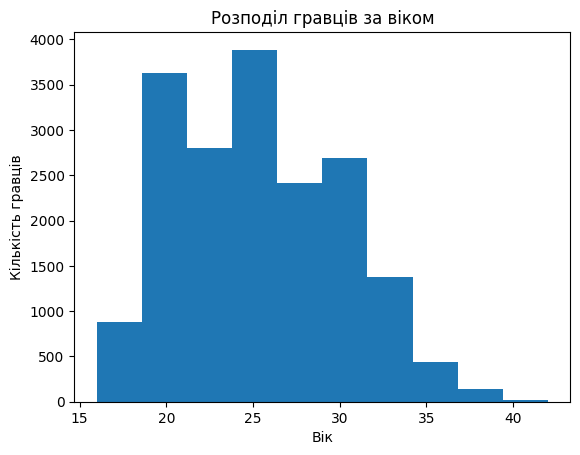

In [13]:
# Побудувати гістограму розподілу гравців за віком (стовпець 'age')
plt.hist(df_dropped['age'])
plt.xlabel('Вік')
plt.ylabel('Кількість гравців')
plt.title('Розподіл гравців за віком')
plt.show()